# Beta-art 

## 1. 목적

새로운 platform의 면역원성을 예측해 가능하다면 면역원성이 적은 후보 물질을 찾는다.

## 2. 사용한 도구

### 2.1. NetMHC 4.0 Server

www.cbs.dtu.dk/services/NetMHCIIpan/

### 2.2. NetMHCIIpan 4.0 Server

www.cbs.dtu.dk/services/NetMHCIIpan/


## 3. 후보물질의 서열

사용된 서열은 총 23개이며 Grap1, Grap3는 컨트롤로 사용된 기존의 서열이다. 후보물질 서열은 다음과 같다.

```
>origin
EFGRPFVEMYSEIPEIIHMTEGRELVIPCRVTSPNITVTLKKFPLDTLIPDGKRIIWDSRKGFIISNATYKEIGLLTCEATVNGHLYKTNYLTHRQTNTIIDVQISTPSPVTLLRGHTLVLNCTATTPLNTRVQMTWSYPDEKNKNASVRRRIDQSNSHANIFYSVLTIDKMQNKDKGLYTCRVRSGPSFKSVNTSVHIYDKALEDKTHTCPPCPAPELLGGPSVFLFPPKPKDTLMISRTPEVTCVVVDVSHEDPEVKFNWYVDGVEVHNAKTKPREEQYNSTYRVVSVLTVLHQDWLNGKEYKCKVSNKALPAPIEKTISKAKGQPREPQVYTLPPSREEMTKNQVSLTCLVKGFYPSDIAVEWESNGQPENNYKTTPPVLDSDGSFFLYSKLTVDKSRWQQGNVFSCSVMHEALHNHYTQKSLSLSPGK
>01C62
EFGRPFVEMYSEIPEIIHMTEGRELVIPCRVTSPNITVTLKKFPLDTLIPDGKRIIWDSRKGFIISNATYKEIGLLTCEATVNGHLYKTNYLTHRQTNTIIDVQISTPSPVELCVGETLVLNCTATTPANTRVQMTWSYPDEKNKNASVRRRIDQSNSHANIFYSVLTIDGMTNSDKGLYTCRVRSGPSFKSVNTSVHIYDCSKVDKKVEPKSSDTPPTCPPCPAPELLGGPSVFLFPPKPKDTLMISRTPEVTCVVVDVSHEDPEVKFNWYVDGVEVHNAKTKPREEQYNSTYRVVSVLTVLHQDWLNGKEYKCKVSNKALPAPIEKTISKAKGQPREPQVYTLPPSRDELTKNQVSLTCLVKGFYPSDIAVEWESNGQPENNYKTTPPVLDSDGSFFLYSKLTVDKSRWQQGNVFSCSVMHEALHNHYTQKSLSLSPG
>01C72
EFGRPFVEMYSEIPEIIHMTEGRELVIPCRVTSPNITVTLKKFPLDTLIPDGKRIIWDSRKGFIISNATYKEIGLLTCEATVNGHLYKTNYLTHRQTNTIIDVQISTPSPVELCVGETLVLNCTATTPSNTRVQMTWSYPDEKNKNASVRRRIDQSNSHANIFYSVLTIDGMTNSDKGLYTCRVRSGPSFKSVNTSVHIYDCGSSGGSSGEPKSDATPTCPPCPAPELLGGPSVFLFPPKPKDTLMISRTPEVTCVVVDVSHEDPEVKFNWYVDGVEVHNAKTKPREEQYNSTYRVVSVLTVLHQDWLNGKEYKCKVSNKALPAPIEKTISKAKGQPREPQVYTLPPSRDELTKNQVSLTCLVKGFYPSDIAVEWESNGQPENNYKTTPPVLDSDGSFFLYSKLTVDKSRWQQGNVFSCSVMHEALHNHYTQKSLSLSPG
>01C73
EFGRPFVEMYSEIPEIIHMTEGRELVIPCRVTSPNITVTLKKFPLDTLIPDGKRIIWDSRKGFIISNATYKEIGLLTCEATVNGHLYKTNYLTHRQTNTIIDVQISTPSPVELCVGETLVLNCTATTPDNTRVQMTWSYPDEKNKNASVRRRIDQSNSHANIFYSVLTIDGMTNSDKGLYTCRVRSGPSFKSVNTSVHIYDCGSSGGSSGEPKSDATPTCPPCPAPELLGGPSVFLFPPKPKDTLMISRTPEVTCVVVDVSHEDPEVKFNWYVDGVEVHNAKTKPREEQYNSTYRVVSVLTVLHQDWLNGKEYKCKVSNKALPAPIEKTISKAKGQPREPQVYTLPPSRDELTKNQVSLTCLVKGFYPSDIAVEWESNGQPENNYKTTPPVLDSDGSFFLYSKLTVDKSRWQQGNVFSCSVMHEALHNHYTQKSLSLSPG
```

The prediction output for each molecule consists of the following columns:

- Score_EL: Eluted ligand prediction score

- %Rank_EL: Percentile rank of eluted ligand prediction score

- Exp_bind: If the input was given in PEPTIDE format with an annotated affinity value (mainly for benchmarking purposes).

- Score_BA: Predicted binding affinity in log-scale (printed only if binding affinity predictions were selected)

- Affinity(nM): Predicted binding affinity in nanomolar IC50 (printed only if binding affinity predictions were selected)

- %Rank_BA: % Rank of predicted affinity compared to a set of 100.000 random natural peptides. This measure is not affected by inherent bias of certain molecules towards higher or lower mean predicted affinities (printed only if binding affinity predictions were selected)

- BindLevel(SB: strong binder, WB: weak binder): The peptide will be identified as a strong binder if the % Rank is below the specified threshold for the strong binders. The peptide will be identified as a weak binder if the % Rank is above the threshold of the strong binders but below the specified threshold for the weak binders.


# 1. MHC class1 분석

In [1]:
import pandas as pd

df = pd.read_csv('./INPUT/220217_NetMHC.csv', index_col=0)
df.tail()

,ID,H-2-Db,H-2-Dd,H-2-Kb,H-2-Kd,H-2-Kk,H-2-Ld
Peptide,,,,,,,
NHYTQKSLS,01C73,47026.3,43922.8,22474.1,7514.6,38414.8,44731.5
HYTQKSLSL,01C73,40339.3,25510.7,8625.1,380.4,31290.4,41199.0
YTQKSLSLS,01C73,44187.9,40837.3,18884.3,18568.4,43131.7,41728.8
TQKSLSLSP,01C73,46811.6,38675.9,33525.5,29670.2,42281.0,46271.8
QKSLSLSPG,01C73,46304.8,44261.6,33255.3,32330.7,41215.0,43529.7


In [2]:
df['ID'].unique()

array(['origin', '01C62', '01C72', '01C73'], dtype=object)

In [3]:
len(df['ID'].unique())

4

## 1.1 데이터나누기

총 4가지 데이터로 나누기



In [4]:
kinds = df['ID'].unique()

def modify_data(df):
    temp_df = df.drop(['ID'], axis=1).rename(index = lambda x : x[:1])
    return temp_df

df_list = {}
for i in kinds:
    df_list[i] = df[df['ID']==i]
    df_list[i].pop('ID')
    df_list[i] = df_list[i].rename(index = lambda x : x[:1])
    

In [5]:
df_list['01C73'].tail()

,H-2-Db,H-2-Dd,H-2-Kb,H-2-Kd,H-2-Kk,H-2-Ld
Peptide,,,,,,
N,47026.3,43922.8,22474.1,7514.6,38414.8,44731.5
H,40339.3,25510.7,8625.1,380.4,31290.4,41199.0
Y,44187.9,40837.3,18884.3,18568.4,43131.7,41728.8
T,46811.6,38675.9,33525.5,29670.2,42281.0,46271.8
Q,46304.8,44261.6,33255.3,32330.7,41215.0,43529.7


## 1.2. 시각화하기

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'


Text(0.5, 6.0, '')

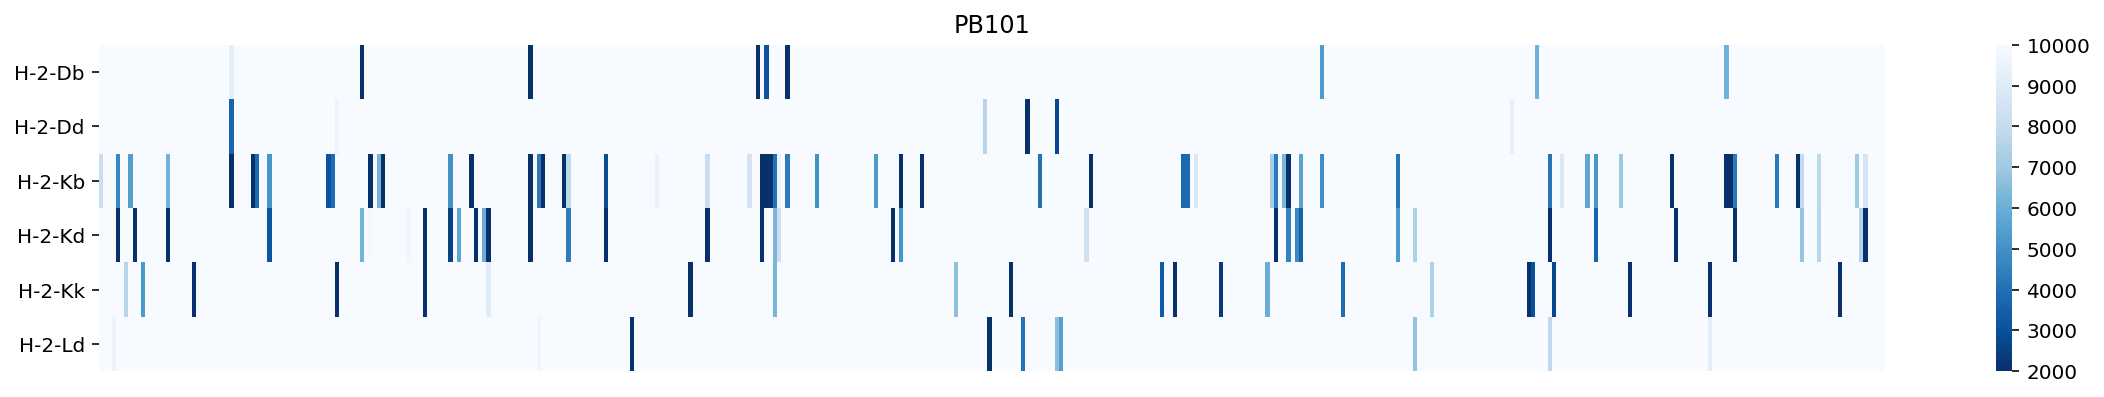

In [7]:
plt.figure(figsize=(20,3))

plt.title('PB101')

sns.heatmap(df_list['origin'][:].T,cmap='Blues_r',square=False, vmin= 2000, vmax=10000)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.xlabel('')


Text(0.5, 86.9999999999999, '')

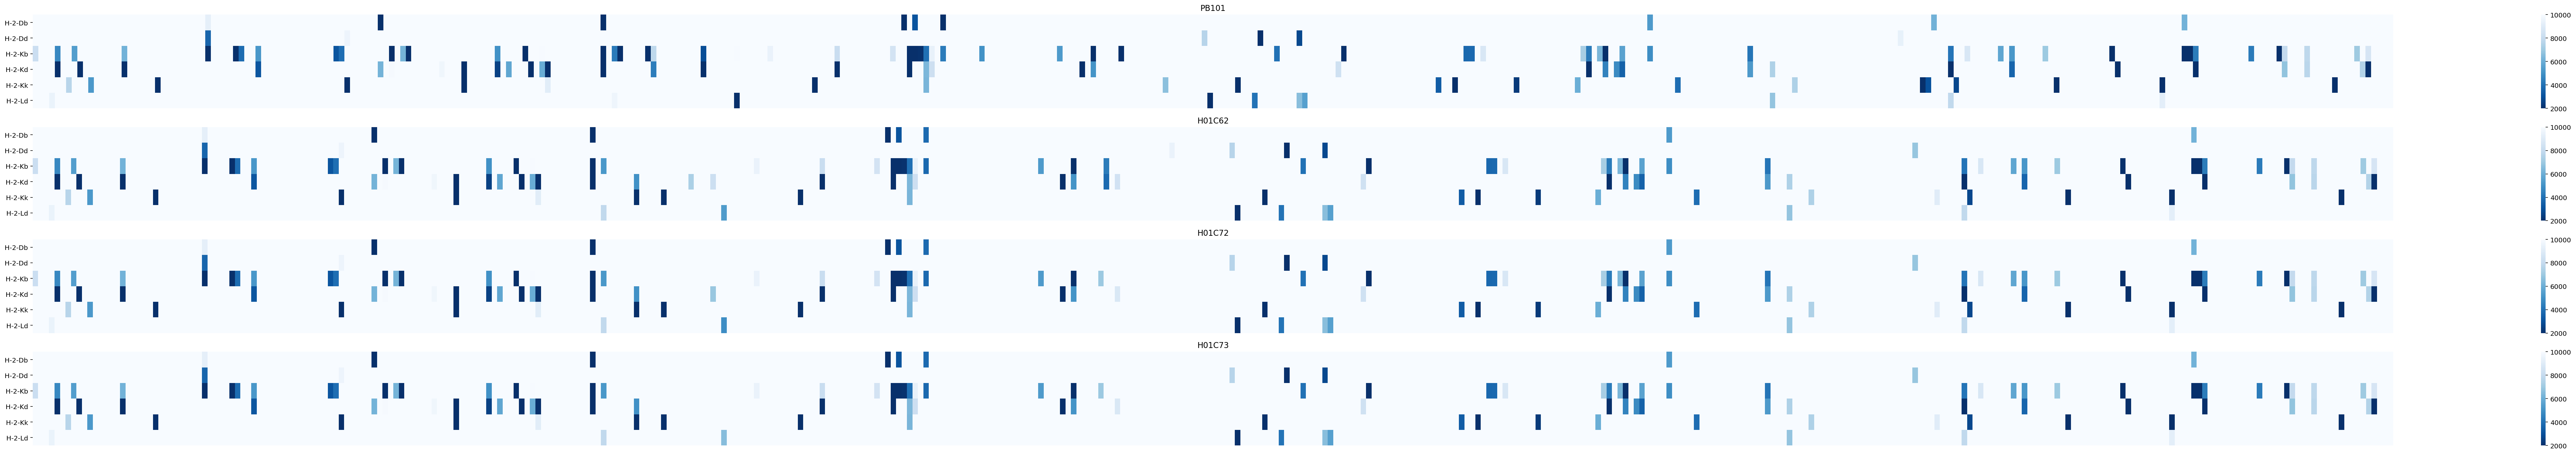

In [8]:
# 플롯 그리기
plt.figure(figsize=(80,12))

plt.subplot(411)
plt.title('PB101')
sns.heatmap(df_list['origin'][:].T,cmap='Blues_r',square=False,vmin= 2000, vmax=10000)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.xlabel('')

plt.subplot(412)
plt.title('H01C62')
sns.heatmap(df_list['01C62'][:].T,cmap='Blues_r',square=False, vmin= 2000, vmax=10000)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.xlabel('')

plt.subplot(413)
plt.title('H01C72')
sns.heatmap(df_list['01C72'][:].T,cmap='Blues_r',square=False, vmin= 2000, vmax=10000)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.xlabel('')

plt.subplot(414)
plt.title('H01C73')
sns.heatmap(df_list['01C73'][:].T,cmap='Blues_r',square=False, vmin= 2000, vmax=10000)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.xlabel('')


Text(0.5, 6.0, '')

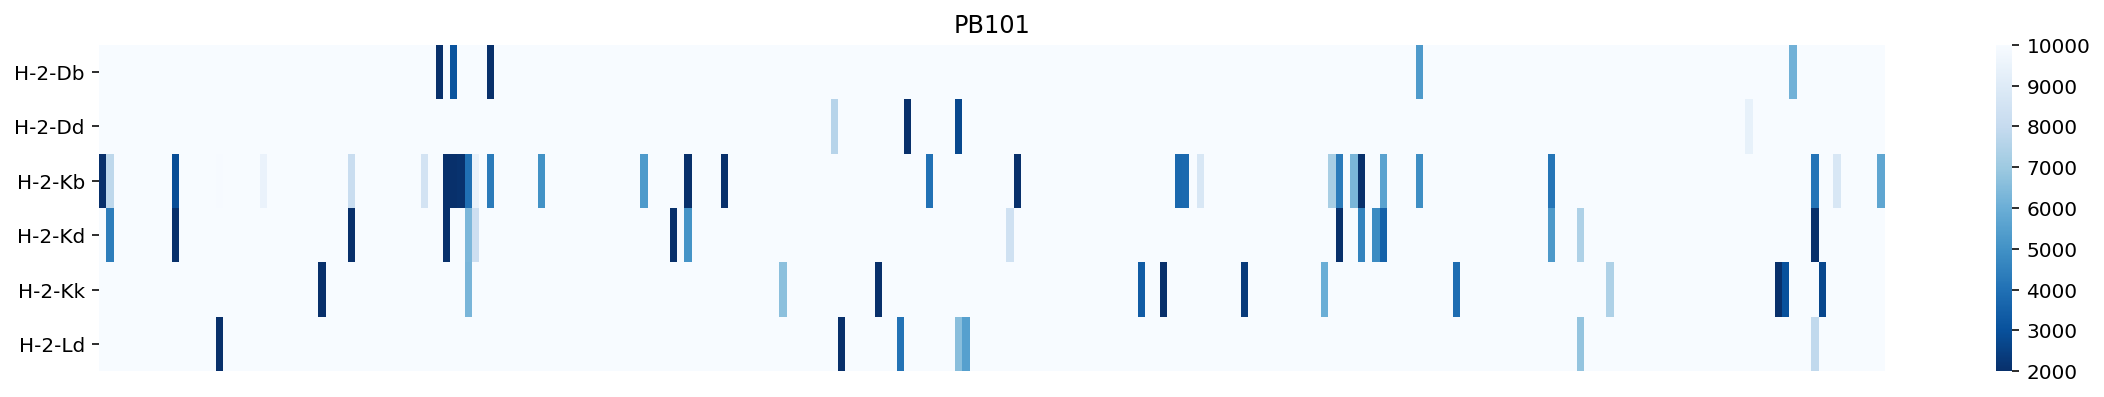

In [9]:
plt.figure(figsize=(20,3))

plt.title('PB101')

sns.heatmap(df_list['origin'][110:-70].T,cmap='Blues_r',square=False, vmin= 2000, vmax=10000)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.xlabel('')


Text(0.5, 86.9999999999999, '')

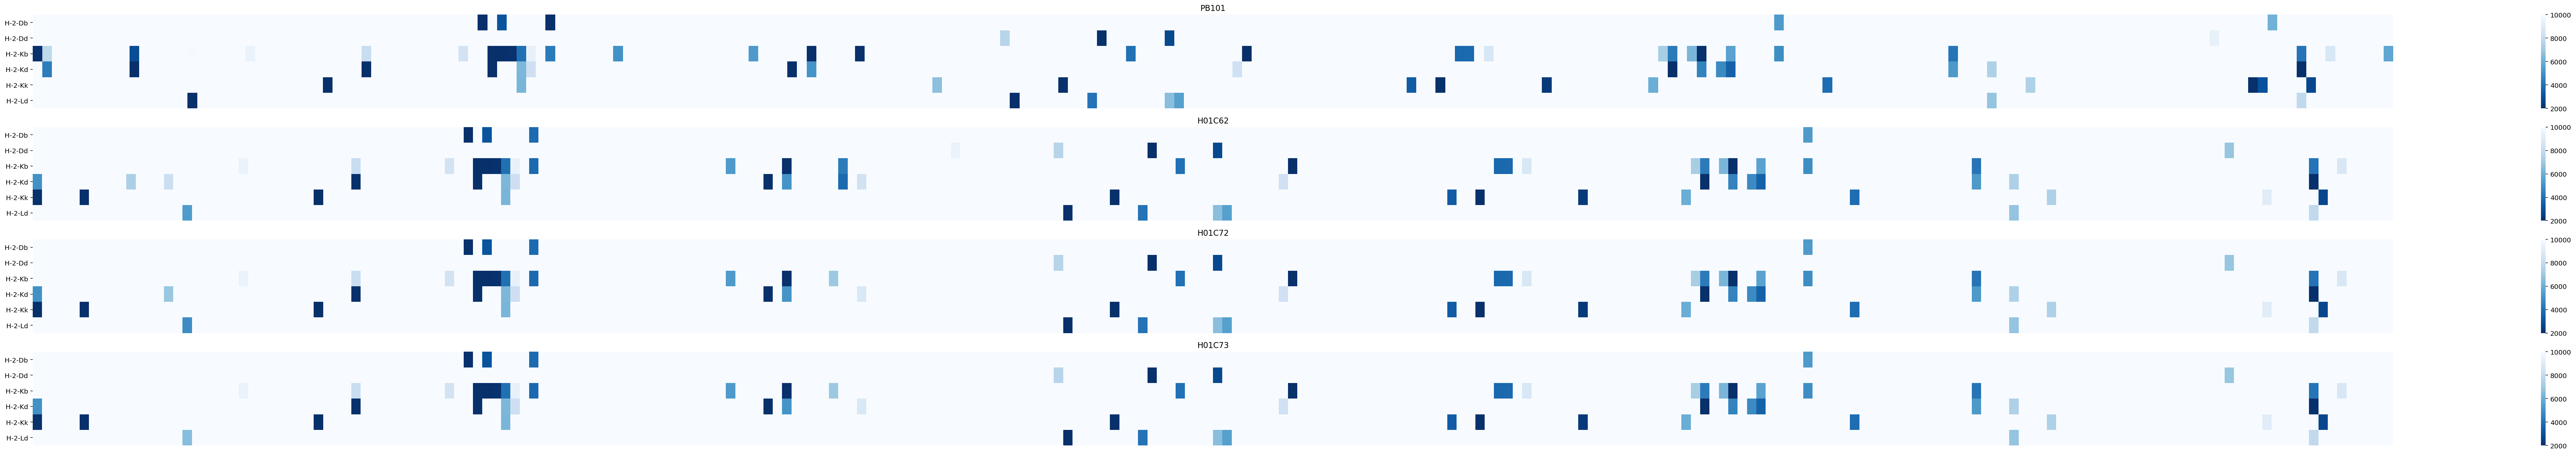

In [10]:
# 플롯 그리기
plt.figure(figsize=(80,12))

plt.subplot(411)
plt.title('PB101')
sns.heatmap(df_list['origin'][110:-70].T,cmap='Blues_r',square=False,vmin= 2000, vmax=10000)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.xlabel('')

plt.subplot(412)
plt.title('H01C62')
sns.heatmap(df_list['01C62'][110:-70].T,cmap='Blues_r',square=False, vmin= 2000, vmax=10000)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.xlabel('')

plt.subplot(413)
plt.title('H01C72')
sns.heatmap(df_list['01C72'][110:-70].T,cmap='Blues_r',square=False, vmin= 2000, vmax=10000)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.xlabel('')

plt.subplot(414)
plt.title('H01C73')
sns.heatmap(df_list['01C73'][110:-70].T,cmap='Blues_r',square=False, vmin= 2000, vmax=10000)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.xlabel('')


# 2. MHC class 2 분석



In [11]:
import pandas as pd

df = pd.read_csv('./INPUT/220217_NetMHCIIpan.csv', index_col=0)
df.tail()

,ID,H-2-IAb,H-2-IAd,H-2-IEd,H-2-IAu,H-2-IEk
Peptide,,,,,,
MHEALHNHYTQKSLS,01C73,10976.903412,2552.355781,6673.165895,1991.734387,443.993084
HEALHNHYTQKSLSL,01C73,8722.591343,1522.297761,5466.817844,1537.094214,313.032966
EALHNHYTQKSLSLS,01C73,8300.073777,1441.288808,5674.679668,1611.203532,325.452471
ALHNHYTQKSLSLSP,01C73,7989.212752,1434.583258,6005.379524,1621.469189,416.693520
LHNHYTQKSLSLSPG,01C73,8492.476840,1027.287607,7498.714487,1853.039140,772.782803


## 2.1 데이터나누기

총 4가지 데이터로 나누기



In [12]:
kinds = df['ID'].unique()

def modify_data(df):
    temp_df = df.drop(['ID'], axis=1).rename(index = lambda x : x[:1])
    return temp_df

df_list = {}
for i in kinds:
    df_list[i] = df[df['ID']==i]
    df_list[i].pop('ID')
    df_list[i] = df_list[i].rename(index = lambda x : x[:1])
    

## 2.2. 시각화하기

Text(0.5, 6.0, '')

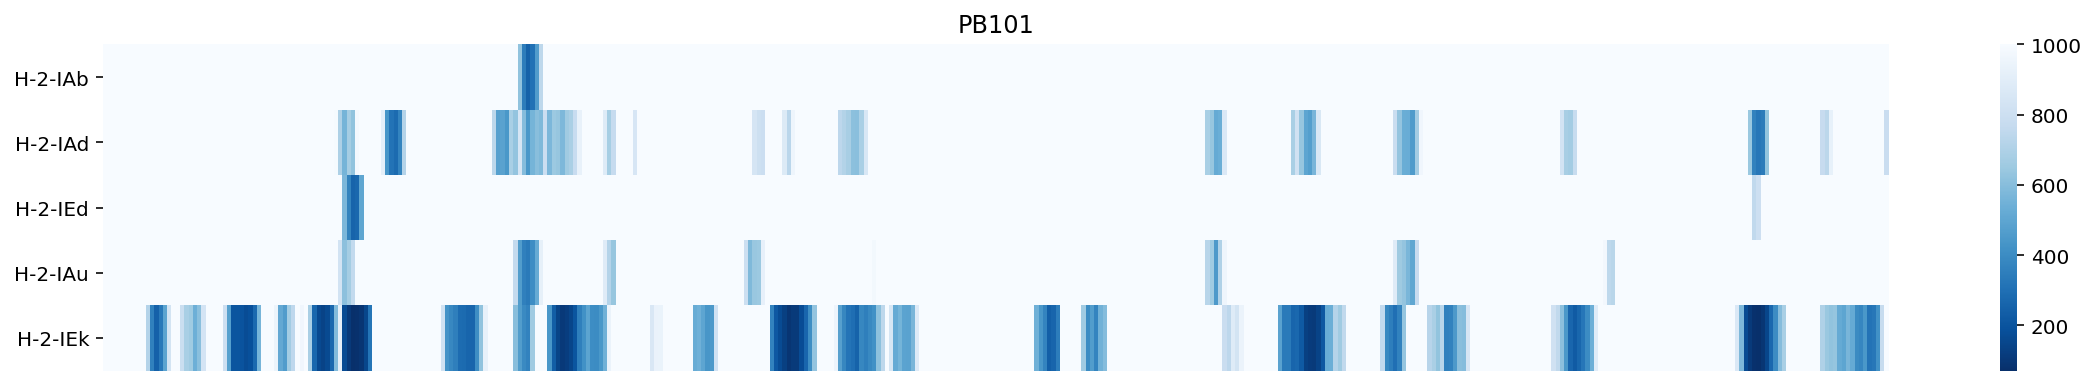

In [13]:
plt.figure(figsize=(20,3))

plt.title('PB101')

sns.heatmap(df_list['origin'][:].T,cmap='Blues_r',square=False, vmax=1000)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.xlabel('')


Text(0.5, 86.9999999999999, '')

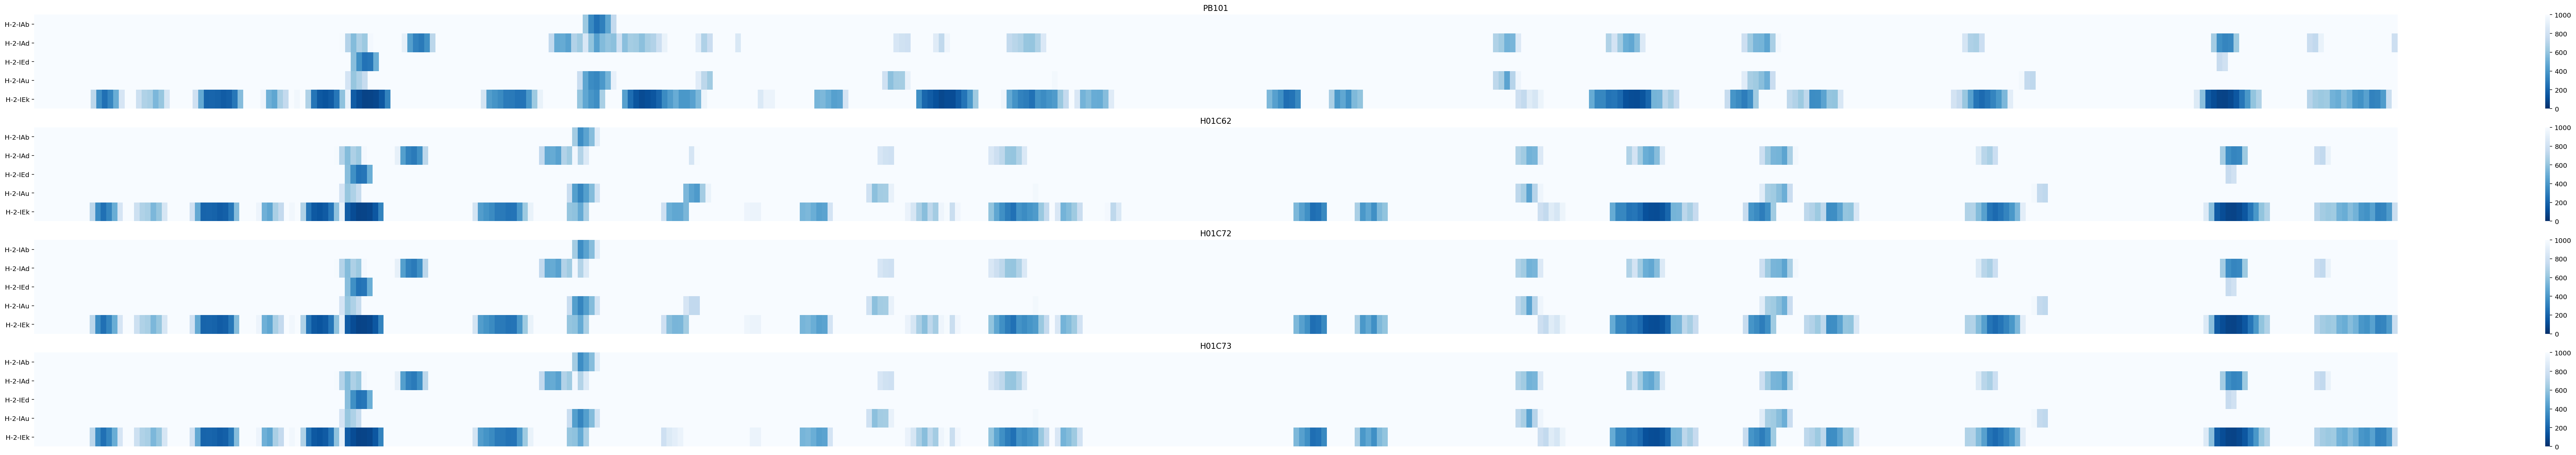

In [16]:
vmax=1000
vmin= 0

# 플롯 그리기
plt.figure(figsize=(80,12))

plt.subplot(411)
plt.title('PB101')
sns.heatmap(df_list['origin'].T,cmap='Blues_r',square=False,vmin= vmin, vmax=vmax)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.xlabel('')

plt.subplot(412)
plt.title('H01C62')
sns.heatmap(df_list['01C62'].T,cmap='Blues_r',square=False, vmin= vmin, vmax=vmax)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.xlabel('')

plt.subplot(413)
plt.title('H01C72')
sns.heatmap(df_list['01C72'].T,cmap='Blues_r',square=False, vmin= vmin, vmax=vmax)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.xlabel('')

plt.subplot(414)
plt.title('H01C73')
sns.heatmap(df_list['01C73'].T,cmap='Blues_r',square=False, vmin= vmin, vmax=vmax)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.xlabel('')


Text(0.5, 6.0, '')

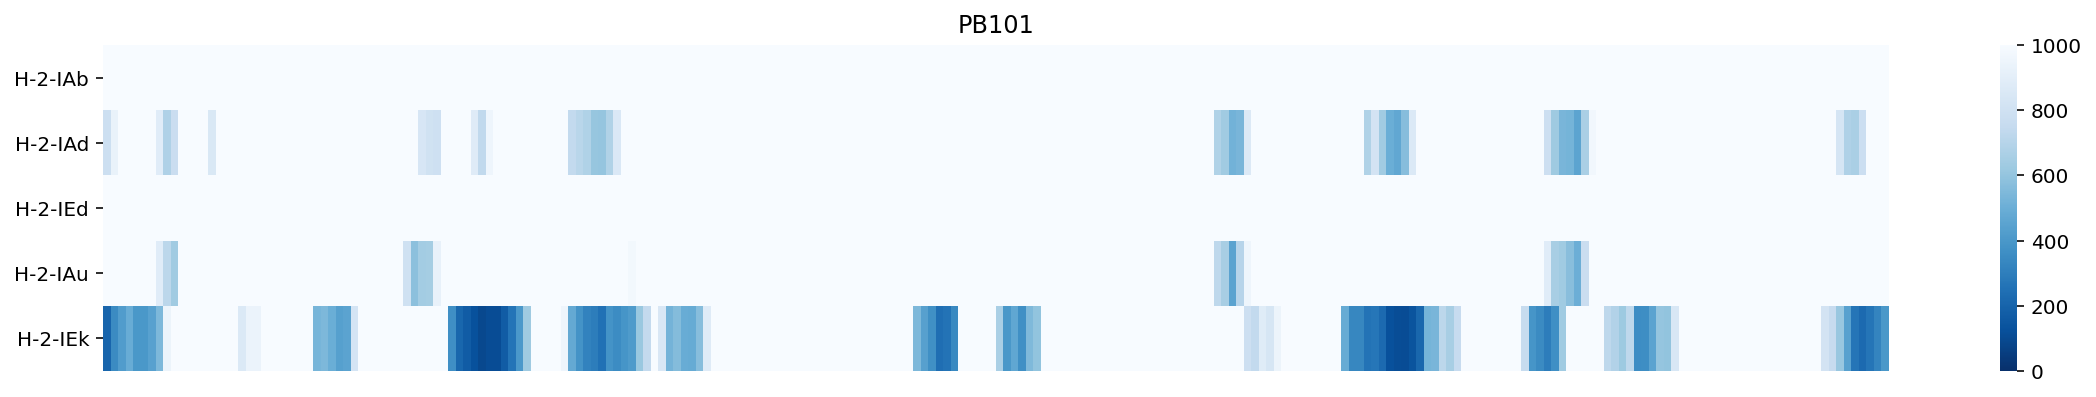

In [14]:
plt.figure(figsize=(20,3))

plt.title('PB101')

sns.heatmap(df_list['origin'][110:-70].T,cmap='Blues_r',square=False, vmin= 0, vmax=1000)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.xlabel('')


Text(0.5, 86.9999999999999, '')

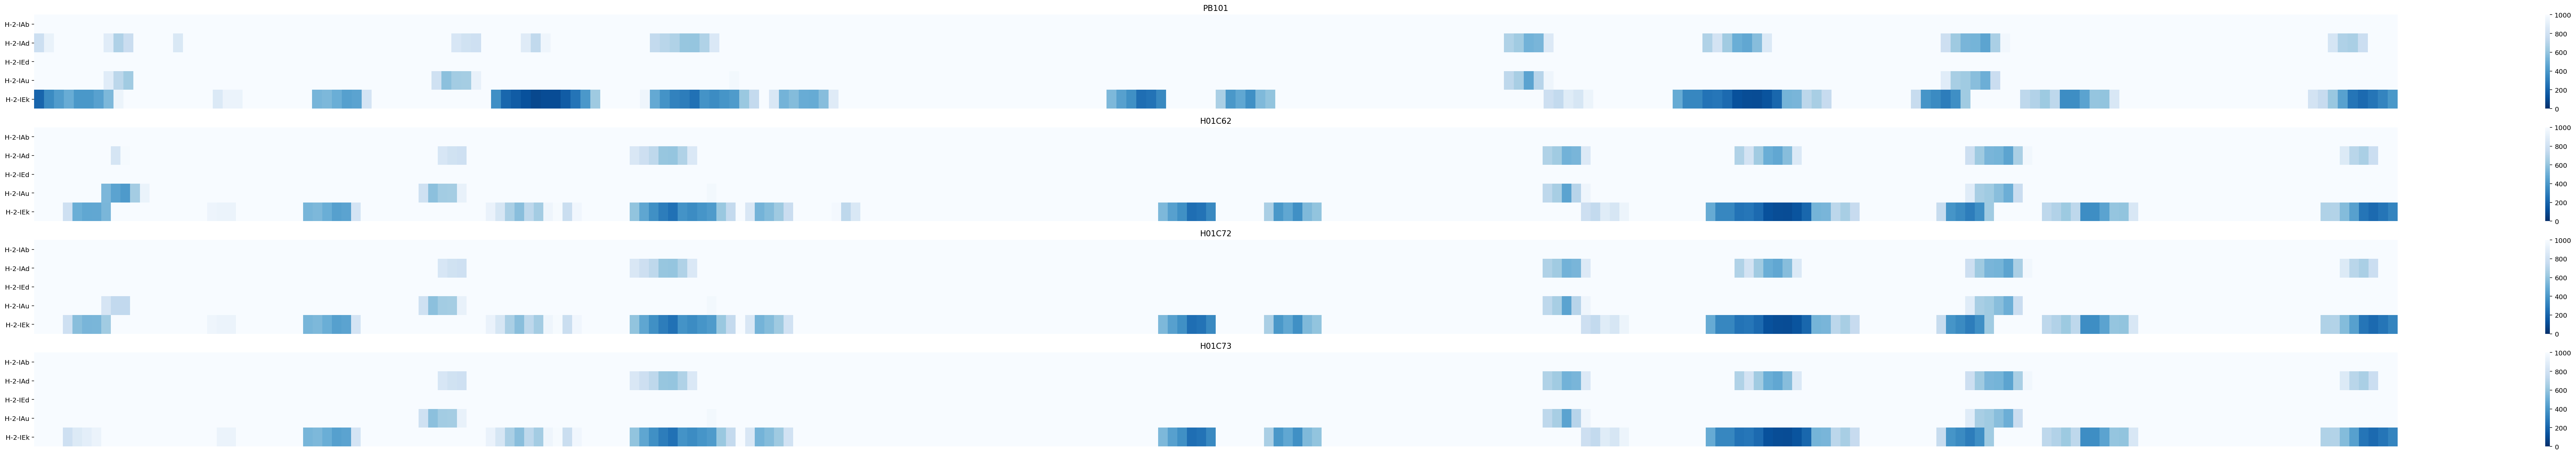

In [15]:
vmax=1000
vmin= 0

# 플롯 그리기
plt.figure(figsize=(80,12))

plt.subplot(411)
plt.title('PB101')
sns.heatmap(df_list['origin'][110:-70].T,cmap='Blues_r',square=False,vmin= vmin, vmax=vmax)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.xlabel('')

plt.subplot(412)
plt.title('H01C62')
sns.heatmap(df_list['01C62'][110:-70].T,cmap='Blues_r',square=False, vmin= vmin, vmax=vmax)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.xlabel('')

plt.subplot(413)
plt.title('H01C72')
sns.heatmap(df_list['01C72'][110:-70].T,cmap='Blues_r',square=False, vmin= vmin, vmax=vmax)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.xlabel('')

plt.subplot(414)
plt.title('H01C73')
sns.heatmap(df_list['01C73'][110:-70].T,cmap='Blues_r',square=False, vmin= vmin, vmax=vmax)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.xlabel('')
